#Simple Linear Regression Modeling

A partir del dataset de la imobiliaria de taiwan que muestra:distancia al metro, número de sumpermercados cercanos, antiguedad de la casa, y su precio final.
Vamos a intentar predecir como influyen los diferentes campos al precio. En nuestro caso de momento nos centraremos en el número de supermercados





*   Muestra ScatterPlot de Precio vs n_convenience
*   Muestra Regplot de Precio vs n_convenience
*   Realitza el modelo y obtén los parámetros y escribe su función de regresión
*   Mediante la función predict del modelo Predice el precio para el rango de 1 a 10 supermercados.
* Compara Gráficamente con los valores reales
* Predice el precio para una casa cercana a 12 supermercados
* Predice el precio para una casa cercana a -1 y 2.5 supermercado. ¿Qué está pasando?





In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

taiwan_df = pd.read_csv('taiwan_real_estate2.csv')

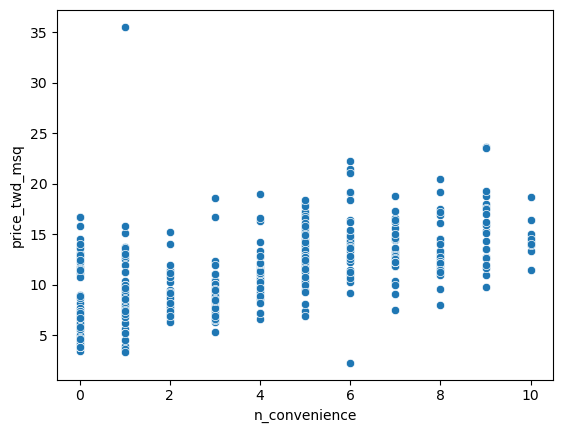

In [62]:
# Muestra ScatterPlot de Precio vs n_convenience
sns.scatterplot(x='n_convenience', y='price_twd_msq', data=taiwan_df)
plt.show()

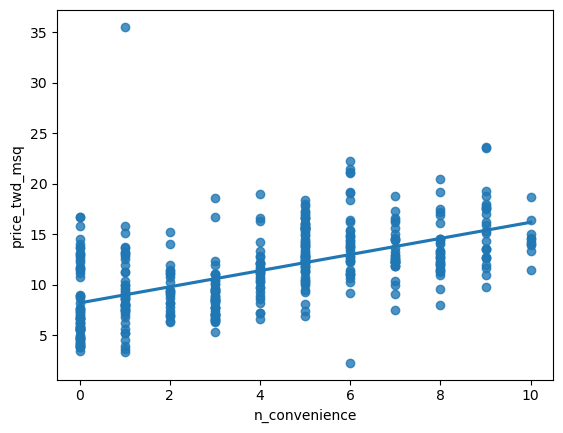

In [63]:
# Muestra Regplot de Precio vs n_convenience
sns.regplot(x='n_convenience', y='price_twd_msq', ci=None, data=taiwan_df)
plt.show()

In [64]:
# Realitza el modelo y obtén los parámetros y escribe su función lineal
convenience_price = ols('price_twd_msq ~ n_convenience', taiwan_df).fit()
print(convenience_price.params)
print(convenience_price.summary())

Intercept        8.224237
n_convenience    0.798080
dtype: float64
                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           3.41e-37
Time:                        20:35:54   Log-Likelihood:                -1091.1
No. Observations:                 414   AIC:                             2186.
Df Residuals:                     412   BIC:                             2194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [65]:
# Mediante la función predict del modelo Predice el precio para el rango de 1 a 10 supermercados.
data_explicativa = pd.DataFrame({'n_convenience': np.arange(1, 11)})
predicted_data = data_explicativa.assign(predicted_price=convenience_price.predict(data_explicativa))
predicted_data

,n_convenience,predicted_price
0,1,9.022317
1,2,9.820397
2,3,10.618477
3,4,11.416556
4,5,12.214636
5,6,13.012716
6,7,13.810795
7,8,14.608875
8,9,15.406955
9,10,16.205035


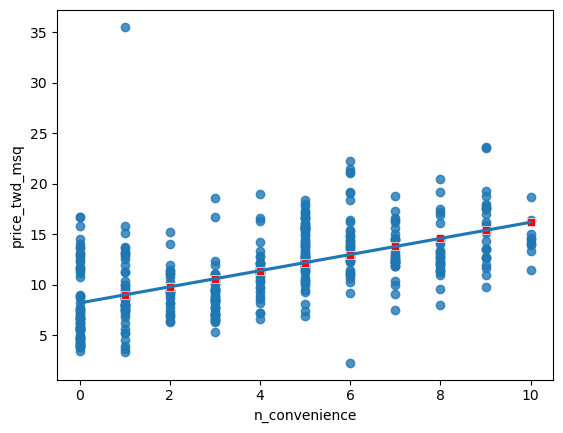

In [72]:
# Compara Gráficamente con los valores reales
fig = plt.figure()
sns.regplot(x='n_convenience', y='price_twd_msq', ci=None, data=taiwan_df)
sns.scatterplot(x='n_convenience', y='predicted_price', data=predicted_data, color='red', marker='s')
plt.show()

In [76]:
# Predice el precio para una casa cercana a 12 supermercados
print(convenience_price.predict(pd.DataFrame({'n_convenience': [12]})))

0    17.801194
dtype: float64


In [77]:
# Predice el precio para una casa cercana a -1 y 2.5 supermercado. ¿Qué está pasando?
print(convenience_price.predict(pd.DataFrame({'n_convenience': [-1, 2.5]})))
print("Está pasando que el modelo no es lineal, por lo que no se puede predecir valores negativos o decimales")

0     7.426158
1    10.219437
dtype: float64
Está pasando que el modelo no es lineal, por lo que no se puede predecir valores negativos o decimales


## Transformaciones

Ahora vamos a visualizar la relación entre el precio y la distancia al metro:


*   Muestra gráficamente la relación entre precio-distáncia al metro. Sigue una relación lineal?
*   Transforma la distáncia en: sqrt_dist_metro_m y muéstra de nuevo la relación con el precio. Qué te parece ahora?
* Calcula la reg con la variable tranformada
* Muestra el resultado
* Compara gráficamente (Regplot y scatterPlot) en los dos casos e interpreta



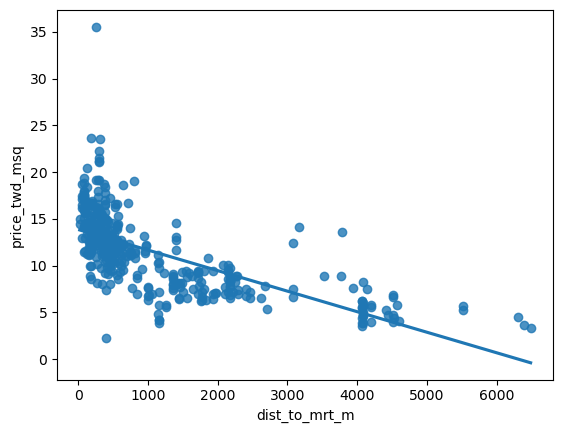

No sigue una relación lineal, ya que la pendiente es muy pronunciada en la parte inferior


In [83]:
# Muestra gráficamente la relación entre precio-distáncia al metro. Sigue una relación lineal?
sns.regplot(x='dist_to_mrt_m', y='price_twd_msq', ci=None, data=taiwan_df)
plt.show()
print("No sigue una relación lineal, ya que la pendiente es muy pronunciada en la parte inferior")

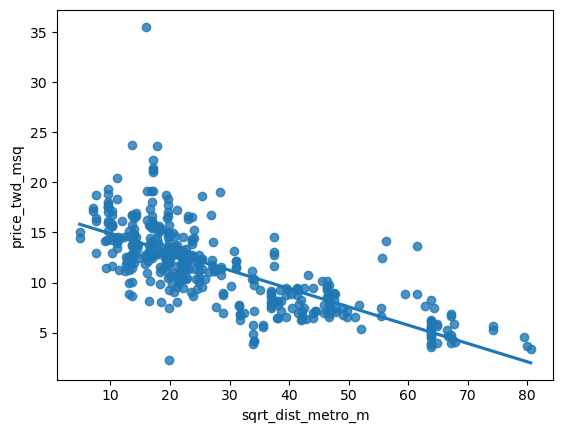

Ahora sí sigue una relación lineal


In [85]:
# Transforma la distáncia en: sqrt_dist_metro_m y muéstra de nuevo la relación con el precio. Qué te parece ahora?
taiwan_df['sqrt_dist_metro_m'] = np.sqrt(taiwan_df['dist_to_mrt_m'])
sns.regplot(x='sqrt_dist_metro_m', y='price_twd_msq', ci=None, data=taiwan_df)
plt.show()
print("Ahora sí sigue una relación lineal")

In [107]:
# Calcula la reg con la variable tranformada
metro_price = ols('price_twd_msq ~ sqrt_dist_metro_m', taiwan_df).fit()
metro_price_org = ols('price_twd_msq ~ dist_to_mrt_m', taiwan_df).fit()
print(metro_price.params)
print(metro_price.summary())

Intercept            16.709799
sqrt_dist_metro_m    -0.182843
dtype: float64
                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     469.7
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           4.55e-70
Time:                        21:04:51   Log-Likelihood:                -1015.3
No. Observations:                 414   AIC:                             2035.
Df Residuals:                     412   BIC:                             2043.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

In [92]:
# Muestra el resultado
data_explicativa = pd.DataFrame({'dist_metro_m': np.arange(0, 6000,500),'sqrt_dist_metro_m':np.sqrt(np.arange(0, 6000,500))})
predicted_data = data_explicativa.assign(predicted_price=metro_price.predict(data_explicativa))
predicted_data

,dist_metro_m,sqrt_dist_metro_m,predicted_price
0,0,0.000000,16.709799
1,500,22.360680,12.621308
2,1000,31.622777,10.927800
3,1500,38.729833,9.628325
4,2000,44.721360,8.532818
5,2500,50.000000,7.567656
6,3000,54.772256,6.695083
7,3500,59.160798,5.892670
8,4000,63.245553,5.145801
9,4500,67.082039,4.444327


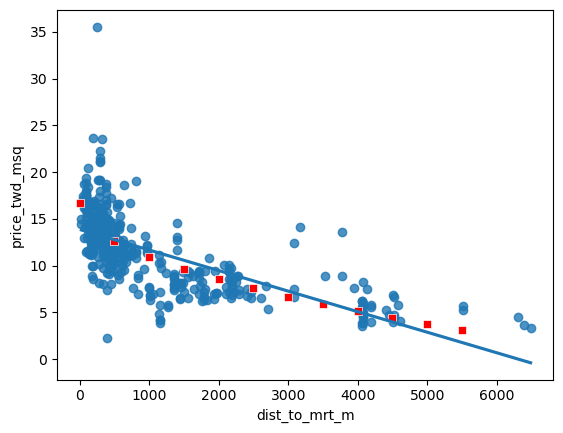

In [94]:
# Compara gráficamente (Regplot y scatterPlot) en los dos casos e interpreta
fig = plt.figure()
sns.regplot(x='dist_to_mrt_m', y='price_twd_msq', ci=None, data=taiwan_df)
sns.scatterplot(x='dist_metro_m', y='predicted_price', data=predicted_data, color='red', marker='s')
plt.show()

## Validación del modelo

* Compara los coeficientes de determiniación. Compara también los MSE
* Observa gráficamente los residuos tanto para el precio vs n_convenience como para el distancia al metro
* Compara el QQplot del modelo (respecto distancia al metro) sin transformar y transformado 

In [108]:
# Compara los coeficientes de determiniación. Compara también los MSE
print("Coeficiente de determinación de la variable original: ", convenience_price.rsquared)
print("Coeficiente de determinación de la variable transformada: ", metro_price.rsquared)
print("MSE de la variable original: ", metro_price_org.mse_resid)
print("MSE de la variable transformada: ", metro_price.mse_resid)

Coeficiente de determinación de la variable original:  0.32604660851305045
Coeficiente de determinación de la variable transformada:  0.5327440614667602
MSE de la variable original:  9.280898491629115
MSE de la variable transformada:  7.938835523599512


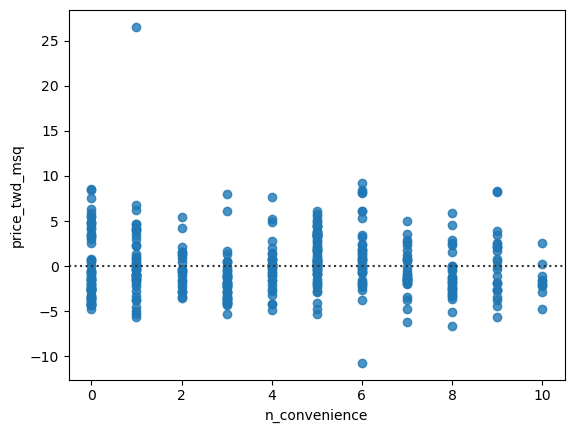

In [96]:
# Observa gráficamente los residuos tanto para el precio vs n_convenience como para el distancia al metro
fig = plt.figure()
sns.residplot(x='n_convenience', y='price_twd_msq', data=taiwan_df)
plt.show()

<Figure size 640x480 with 0 Axes>

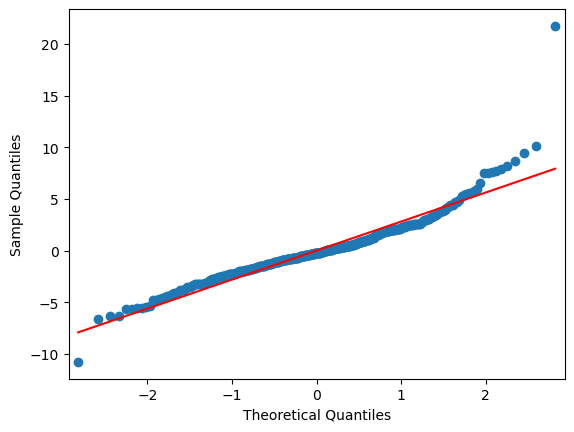

<Figure size 640x480 with 0 Axes>

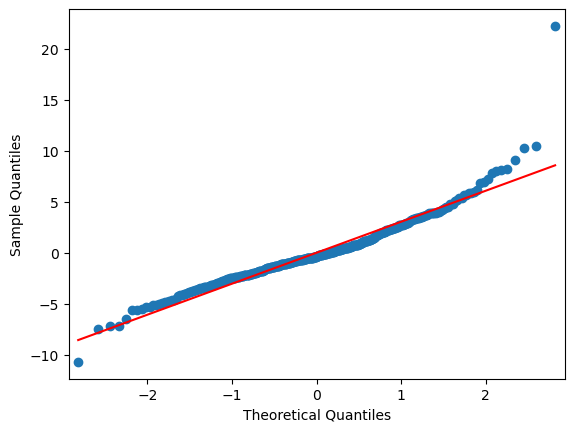

In [109]:
# Compara el QQplot del modelo (respecto distancia al metro) sin transformar y transformado
import statsmodels.api as sm
fig = plt.figure()
sm.qqplot(metro_price.resid, line='s')
plt.show()

fig = plt.figure()
sm.qqplot(metro_price_org.resid, line='s')
plt.show()